# Gradient Descent

In [2]:
import warnings
warnings.filterwarnings("ignore")

import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Preparing the dataset
# Random datas with 500 rows and 2 columns(x and y)
data = np.random.randn(500, 2)

In [4]:
data[0]

array([-0.40691194,  0.04382797])

In [5]:
# The first column is the x value
data [0, 0]

-0.40691194491724714

In [6]:
# The second column is the x value
data [0, 1]

0.04382796644788997

In [7]:
# We have two parameters, and . We store both of these parameters in an array called theta. First, we initialize theta with zeros.
theta = np.zeros(2)

In [8]:
# The theta[0] function represents the value of , while the theta[1] function represents the value of b
theta

array([0., 0.])

In [9]:
# The loss function
def loss_function(data,theta):
  m = theta[0]
  b = theta[1]
  loss = 0
  for i in range(0, len(data)):
    x = data[i, 0]
    y = data[i, 1]
    y_hat = (m*x + b)
    loss = loss + ((y - (y_hat)) ** 2)
  mse = loss / float(len(data)) #mse=mean squared error
  return mse

In [10]:
loss_function(data, theta)

1.1358929289620783

In [11]:
# Computing the gradient of the loss function
def compute_gradients(data, theta):
  gradients = np.zeros(2)
  N = float(len(data))
  m = theta[0]
  b = theta[1]
  for i in range(0, len(data)):
    x = data[i, 0]
    y = data[i, 1]
    # the gradient of the loss with respect to m
    gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
    # the gradient of the loss with respect to b
    gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
  epsilon = 1e-6
  gradients = np.divide(gradients, N + epsilon)
  return gradients

In [12]:
compute_gradients(data, theta)

array([0.00018097, 0.00011011])

In [13]:
# Updating the model parameters
num_iterations = 50000

lr = 1e-2 #learning rate

loss = []

In [14]:
theta = np.zeros(2)
for t in range(num_iterations):
  # compute gradients
  gradients = compute_gradients(data, theta)
  # update parameter
  theta = theta - (lr*gradients)
  # store the loss
  loss.append(loss_function(data,theta))

Text(0.5, 1.0, 'Gradient Descent')

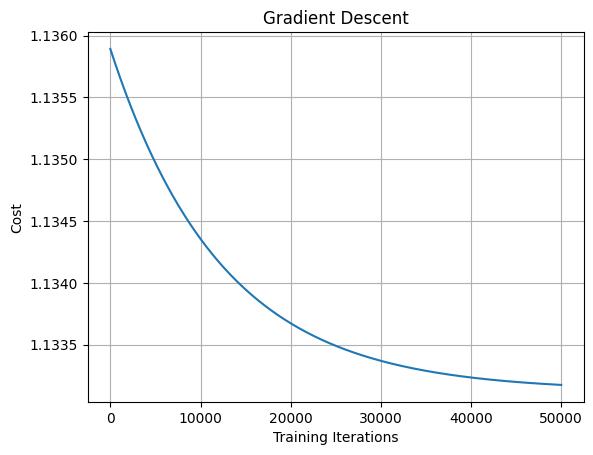

In [15]:
#plotting the loss function
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

Gradient Descent -> We update the parameter of the model after iterating all the data points in our training set.

Stochastic gradient descent (SGD) -> We update the
parameters of the model after iterating through every single data point in our
training set.

The contour plot of SGD and mini-batch GD:

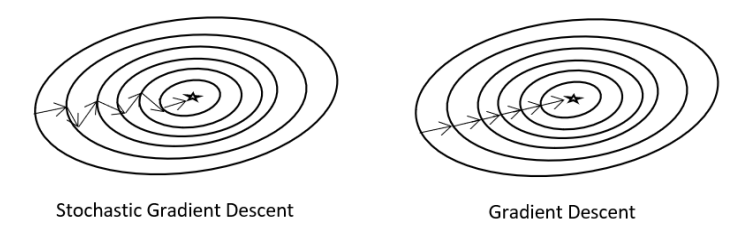

Mini-Batch GD: Update the
parameters after iterating some batches of data points.

The contour plot of SGD and mini-batch gradient descent:

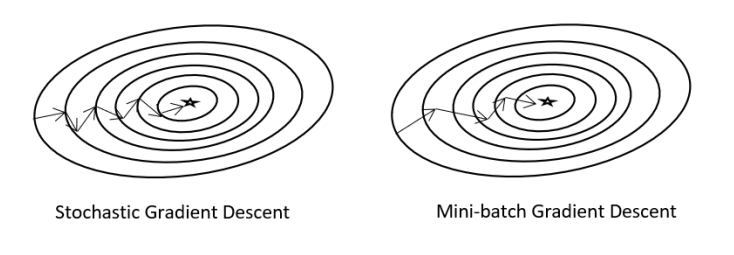

### Mini-batch gradient descent

In [17]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 1000):
  minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
  for t in range(num_iterations):
    sample_size = random.sample(range(len(data)), minibatch_size)
    np.random.shuffle(data)
    sample_data = data[0:sample_size[0], :]
    grad = compute_gradients(sample_data, theta)
    theta = theta - (lr * grad)
  return theta

minibatch(data, theta)

array([-0.00335168,  0.01226204])

### Momentum-based gradient descent

In [18]:
def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    vt = gamma * vt + lr * gradients
    theta = theta - vt
  return theta
momentum(data, theta)

array([-0.04058685, -0.02496516])

### Nestrov Accelerated Gradient

In [19]:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta - gamma * vt)
    vt = gamma * vt + lr * gradients
    theta = theta - vt
  return theta

NAG(data, theta)

array([-0.04058627, -0.0249648 ])

### AdaGard(Adaptive Gradient Descent )

In [20]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 10000):
  gradients_sum = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    gradients_sum += gradients ** 2
    gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
    theta = theta - (lr * gradient_update)
  return theta
AdaGrad(data, theta)

array([-0.04446184, -0.02744162])

In [21]:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 1000):
  E_grad2 = np.zeros(theta.shape[0])
  E_delta_theta2 = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
    delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 +epsilon)) * gradients
    E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta **2))
    theta = theta + delta_theta
  return theta

AdaDelta(data, theta)

array([-0.0443635 , -0.02737533])

In [22]:
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations =1000):
  E_grad2 = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
    theta = theta - (lr / (np.sqrt(E_grad2 + epsilon)) * gradients)
  return theta

RMSProp(data, theta)

array([-0.04446184, -0.02744162])

### ADAM optimizer(Adaptive moment Estimation )

In [23]:
def Adam(data, theta, lr=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1.0 - beta1) * gradients
        vt = beta2 * vt + (1.0 - beta2) * (gradients ** 2)
        mt_hat = mt / (1.0 - beta1 ** (t + 1))
        vt_hat = vt / (1.0 - beta2 ** (t + 1))
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta
Adam(data, theta)

array([-0.04446184, -0.02744162])

In [24]:
# Adamax - Adam based on infinity norm
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 1000):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = np.maximum(beta2 * vt, np.abs(gradients))
        mt_hat = mt / (1. - beta1 ** (t+1))
        theta = theta - ((lr / (vt + epsilon)) * mt_hat)
    return theta

Adamax(data, theta)

array([-0.04446184, -0.02744162])

In [25]:
# Adaptive moment estimation with AMSGrad
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    vt_hat = np.zeros(theta.shape[0])
    for t in range(num_iterations):
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        vt_hat = np.maximum(vt_hat,vt)
        mt_hat = mt / (1. - beta1 ** (t+1))
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta

AMSGrad(data, theta)

array([-9.71397639, -9.46697956])

In [26]:
# Nadam - adding NAG to ADAM
def nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 500):
    mt = np.zeros(theta.shape[0])
    vt = np.zeros(theta.shape[0])
    beta_prod = 1
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        mt = beta1 * mt + (1. - beta1) * gradients
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        beta_prod = beta_prod * (beta1)
        mt_hat = mt / (1. - beta_prod)
        g_hat = gradients / (1. - beta_prod)
        vt_hat = vt / (1. - beta2 ** (t))
        mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
    return theta

nadam(data, theta)

array([-0.04446184, -0.02744162])